# 세상에 없는 얼굴 GAN, 오토인코더
* 생성적 적대 신경망(generative Adversarial Networks)

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, Input
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU,\
                                    UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# 이미지가 저장될 폴더가 없으면 생성
import os
if not os.path.exists('./gan_images'):
    os.makedirs('./gan_images')
np.random.seed(3)
tf.random.set_seed(3)

In [8]:
# 생성자 모델 생성
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2))) #128은 임의로 정한 노드의 수, 7*7 : 이미지의 최초 크기
generator.add(BatchNormalization()) # 배치 정규화
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D()) # 가로, 세로 크기를 2배씩 늘려줌 (14*14)
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 가로, 세로 크기를 2배씩 늘려줌 (28*28)
generator.add(Conv2D(1, kernel_size=5, padding='same',
                    activation='tanh'))

In [13]:
# 판별자 모델 생성

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, 
                         input_shape=(28, 28, 1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2,
                        padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False # 판별자는 진짜인지 가짜인지 판별만 해줄 뿐, 자기 자신이 학습을 해서는 안됨
                                # 가중치를 저장하는 학습기능을 꺼야함

In [17]:
# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.6743  g_loss:0.6768
epoch:1  d_loss:0.4161  g_loss:0.3217
epoch:2  d_loss:0.4934  g_loss:0.0760
epoch:3  d_loss:0.7369  g_loss:0.0479
epoch:4  d_loss:0.7328  g_loss:0.1360
epoch:5  d_loss:0.5582  g_loss:0.4528
epoch:6  d_loss:0.4979  g_loss:0.8691
epoch:7  d_loss:0.5317  g_loss:1.0754
epoch:8  d_loss:0.5194  g_loss:1.0203
epoch:9  d_loss:0.4550  g_loss:0.9518
epoch:10  d_loss:0.3422  g_loss:0.8885
epoch:11  d_loss:0.3030  g_loss:0.9849
epoch:12  d_loss:0.2586  g_loss:1.0760
epoch:13  d_loss:0.2353  g_loss:1.2843
epoch:14  d_loss:0.4555  g_loss:0.9660
epoch:15  d_loss:0.3301  g_loss:1.1822
epoch:16  d_loss:0.2932  g_loss:1.0632
epoch:17  d_loss:0.7553  g_loss:0.6692
epoch:18  d_loss:0.7181  g_loss:0.5208
epoch:19  d_loss:0.4944  g_loss:0.5784
epoch:20  d_loss:0.5780  g_loss:0.7799
epoch:21  d_loss:0.7209  g_loss:0.7665
epoch:22  d_loss:0.6293  g_loss:0.8048
epoch:23  d_loss:0.5574  g_loss:0.6880
epoch:24  d_loss:0.4794  g_loss:0.7431
epoch:25  d_loss:0.4925  g_loss:0.8

epoch:208  d_loss:0.5444  g_loss:1.7026
epoch:209  d_loss:0.4833  g_loss:1.4130
epoch:210  d_loss:0.4905  g_loss:1.5412
epoch:211  d_loss:0.4670  g_loss:1.9136
epoch:212  d_loss:0.6531  g_loss:2.0683
epoch:213  d_loss:0.5361  g_loss:1.5863
epoch:214  d_loss:0.6064  g_loss:1.0996
epoch:215  d_loss:0.5236  g_loss:1.5647
epoch:216  d_loss:0.4234  g_loss:1.3099
epoch:217  d_loss:0.4376  g_loss:1.8169
epoch:218  d_loss:0.4023  g_loss:1.6063
epoch:219  d_loss:0.4905  g_loss:1.8151
epoch:220  d_loss:0.4749  g_loss:2.0025
epoch:221  d_loss:0.4196  g_loss:2.1486
epoch:222  d_loss:0.4834  g_loss:1.6470
epoch:223  d_loss:0.3369  g_loss:2.1705
epoch:224  d_loss:0.4925  g_loss:2.0488
epoch:225  d_loss:0.3860  g_loss:2.2948
epoch:226  d_loss:0.4165  g_loss:2.5784
epoch:227  d_loss:0.4335  g_loss:2.4397
epoch:228  d_loss:0.5133  g_loss:2.0836
epoch:229  d_loss:0.4394  g_loss:1.9135
epoch:230  d_loss:0.4685  g_loss:2.0806
epoch:231  d_loss:0.5261  g_loss:2.2493
epoch:232  d_loss:0.6296  g_loss:1.9104


epoch:413  d_loss:0.3644  g_loss:2.2585
epoch:414  d_loss:0.2259  g_loss:2.6682
epoch:415  d_loss:0.2337  g_loss:3.4167
epoch:416  d_loss:0.2662  g_loss:2.9219
epoch:417  d_loss:0.2567  g_loss:3.1886
epoch:418  d_loss:0.3397  g_loss:2.5963
epoch:419  d_loss:0.2324  g_loss:2.5755
epoch:420  d_loss:0.2994  g_loss:2.7614
epoch:421  d_loss:0.2870  g_loss:3.1364
epoch:422  d_loss:0.2035  g_loss:2.4975
epoch:423  d_loss:0.3280  g_loss:2.6267
epoch:424  d_loss:0.2605  g_loss:2.4970
epoch:425  d_loss:0.2239  g_loss:2.8359
epoch:426  d_loss:0.2165  g_loss:2.3675
epoch:427  d_loss:0.3449  g_loss:1.9770
epoch:428  d_loss:0.2668  g_loss:2.9865
epoch:429  d_loss:0.4265  g_loss:2.7327
epoch:430  d_loss:0.3762  g_loss:2.7146
epoch:431  d_loss:0.2599  g_loss:3.2457
epoch:432  d_loss:0.1712  g_loss:3.5358
epoch:433  d_loss:0.4158  g_loss:2.5940
epoch:434  d_loss:0.3322  g_loss:2.3690
epoch:435  d_loss:0.2902  g_loss:2.8461
epoch:436  d_loss:0.2266  g_loss:3.1034
epoch:437  d_loss:0.2953  g_loss:3.3108


epoch:618  d_loss:0.5683  g_loss:1.7822
epoch:619  d_loss:0.4967  g_loss:1.3448
epoch:620  d_loss:0.4754  g_loss:1.2281
epoch:621  d_loss:0.5045  g_loss:1.4498
epoch:622  d_loss:0.5996  g_loss:1.4147
epoch:623  d_loss:0.4173  g_loss:1.8431
epoch:624  d_loss:0.5588  g_loss:1.2270
epoch:625  d_loss:0.7279  g_loss:1.2204
epoch:626  d_loss:0.7870  g_loss:1.2369
epoch:627  d_loss:0.7999  g_loss:1.5094
epoch:628  d_loss:0.5482  g_loss:1.5123
epoch:629  d_loss:0.5669  g_loss:1.7927
epoch:630  d_loss:0.5087  g_loss:2.2546
epoch:631  d_loss:0.6628  g_loss:2.0754
epoch:632  d_loss:0.6304  g_loss:1.6698
epoch:633  d_loss:0.5661  g_loss:1.4526
epoch:634  d_loss:0.5559  g_loss:1.7956
epoch:635  d_loss:0.3861  g_loss:1.9538
epoch:636  d_loss:0.5164  g_loss:2.5447
epoch:637  d_loss:0.3083  g_loss:3.5375
epoch:638  d_loss:0.4453  g_loss:3.0243
epoch:639  d_loss:0.2614  g_loss:2.3667
epoch:640  d_loss:0.2733  g_loss:2.4392
epoch:641  d_loss:0.4401  g_loss:2.0388
epoch:642  d_loss:0.3152  g_loss:1.7168


epoch:823  d_loss:0.7177  g_loss:1.6875
epoch:824  d_loss:0.8662  g_loss:1.6050
epoch:825  d_loss:0.7539  g_loss:2.2428
epoch:826  d_loss:1.0671  g_loss:1.9953
epoch:827  d_loss:0.8214  g_loss:1.4009
epoch:828  d_loss:0.6632  g_loss:1.3191
epoch:829  d_loss:0.6809  g_loss:1.3083
epoch:830  d_loss:0.4810  g_loss:1.7969
epoch:831  d_loss:0.5259  g_loss:1.9587
epoch:832  d_loss:0.3258  g_loss:2.2128
epoch:833  d_loss:0.3018  g_loss:2.0619
epoch:834  d_loss:0.3669  g_loss:2.1791
epoch:835  d_loss:0.2575  g_loss:2.1462
epoch:836  d_loss:0.3473  g_loss:1.9192
epoch:837  d_loss:0.3297  g_loss:2.3042
epoch:838  d_loss:0.2768  g_loss:2.7875
epoch:839  d_loss:0.2956  g_loss:2.9502
epoch:840  d_loss:0.2773  g_loss:2.6615
epoch:841  d_loss:0.2334  g_loss:2.4175
epoch:842  d_loss:0.2181  g_loss:2.2156
epoch:843  d_loss:0.2488  g_loss:2.5368
epoch:844  d_loss:0.2209  g_loss:2.9163
epoch:845  d_loss:0.2918  g_loss:2.7794
epoch:846  d_loss:0.2167  g_loss:3.2880
epoch:847  d_loss:0.2093  g_loss:3.7231


epoch:1028  d_loss:0.3739  g_loss:2.2121
epoch:1029  d_loss:0.4953  g_loss:2.0375
epoch:1030  d_loss:0.4203  g_loss:1.7041
epoch:1031  d_loss:0.4136  g_loss:1.8678
epoch:1032  d_loss:0.4277  g_loss:2.1367
epoch:1033  d_loss:0.3244  g_loss:2.5129
epoch:1034  d_loss:0.3923  g_loss:2.4600
epoch:1035  d_loss:0.4661  g_loss:2.3415
epoch:1036  d_loss:0.5403  g_loss:1.9093
epoch:1037  d_loss:0.3564  g_loss:1.9900
epoch:1038  d_loss:0.3928  g_loss:2.2701
epoch:1039  d_loss:0.4044  g_loss:1.8840
epoch:1040  d_loss:0.5334  g_loss:2.6610
epoch:1041  d_loss:0.3326  g_loss:2.3954
epoch:1042  d_loss:0.5464  g_loss:2.2732
epoch:1043  d_loss:0.4953  g_loss:2.3611
epoch:1044  d_loss:0.5976  g_loss:1.4305
epoch:1045  d_loss:0.7046  g_loss:1.5443
epoch:1046  d_loss:0.5467  g_loss:1.9405
epoch:1047  d_loss:0.4231  g_loss:2.2032
epoch:1048  d_loss:0.5704  g_loss:1.8376
epoch:1049  d_loss:0.4292  g_loss:1.9440
epoch:1050  d_loss:0.5629  g_loss:1.8274
epoch:1051  d_loss:0.6367  g_loss:1.8312
epoch:1052  d_lo

epoch:1228  d_loss:0.3682  g_loss:1.7493
epoch:1229  d_loss:0.4293  g_loss:1.5147
epoch:1230  d_loss:0.2810  g_loss:1.9782
epoch:1231  d_loss:0.4135  g_loss:2.2116
epoch:1232  d_loss:0.2796  g_loss:2.0733
epoch:1233  d_loss:0.4476  g_loss:2.0061
epoch:1234  d_loss:0.4049  g_loss:1.5313
epoch:1235  d_loss:0.3257  g_loss:2.0147
epoch:1236  d_loss:0.3348  g_loss:2.1913
epoch:1237  d_loss:0.4570  g_loss:2.4483
epoch:1238  d_loss:0.3805  g_loss:2.1835
epoch:1239  d_loss:0.4084  g_loss:1.9909
epoch:1240  d_loss:0.4272  g_loss:1.9923
epoch:1241  d_loss:0.4478  g_loss:1.7994
epoch:1242  d_loss:0.3724  g_loss:2.0071
epoch:1243  d_loss:0.3820  g_loss:2.4423
epoch:1244  d_loss:0.4335  g_loss:2.2891
epoch:1245  d_loss:0.4388  g_loss:2.1821
epoch:1246  d_loss:0.4330  g_loss:2.1447
epoch:1247  d_loss:0.3394  g_loss:1.5893
epoch:1248  d_loss:0.5785  g_loss:2.0008
epoch:1249  d_loss:0.5203  g_loss:1.7576
epoch:1250  d_loss:0.4403  g_loss:2.0545
epoch:1251  d_loss:0.5276  g_loss:1.7557
epoch:1252  d_lo

epoch:1428  d_loss:0.4434  g_loss:2.1024
epoch:1429  d_loss:0.4334  g_loss:1.7724
epoch:1430  d_loss:0.4431  g_loss:1.9074
epoch:1431  d_loss:0.4727  g_loss:1.5236
epoch:1432  d_loss:0.4822  g_loss:1.4042
epoch:1433  d_loss:0.4542  g_loss:1.3391
epoch:1434  d_loss:0.5343  g_loss:1.3912
epoch:1435  d_loss:0.4376  g_loss:1.6064
epoch:1436  d_loss:0.4236  g_loss:1.7891
epoch:1437  d_loss:0.4612  g_loss:1.9279
epoch:1438  d_loss:0.6334  g_loss:1.7638
epoch:1439  d_loss:0.4878  g_loss:1.8760
epoch:1440  d_loss:0.5382  g_loss:1.7157
epoch:1441  d_loss:0.4497  g_loss:1.3646
epoch:1442  d_loss:0.6153  g_loss:1.3430
epoch:1443  d_loss:0.5766  g_loss:1.8292
epoch:1444  d_loss:0.3904  g_loss:1.8924
epoch:1445  d_loss:0.3846  g_loss:1.8114
epoch:1446  d_loss:0.4762  g_loss:1.4893
epoch:1447  d_loss:0.5582  g_loss:1.5967
epoch:1448  d_loss:0.5327  g_loss:1.3829
epoch:1449  d_loss:0.5890  g_loss:1.3245
epoch:1450  d_loss:0.4156  g_loss:1.6539
epoch:1451  d_loss:0.4987  g_loss:1.6231
epoch:1452  d_lo

epoch:1628  d_loss:0.4359  g_loss:1.8197
epoch:1629  d_loss:0.5812  g_loss:1.8291
epoch:1630  d_loss:0.5059  g_loss:1.7547
epoch:1631  d_loss:0.4910  g_loss:1.5271
epoch:1632  d_loss:0.4537  g_loss:1.2825
epoch:1633  d_loss:0.4654  g_loss:1.4363
epoch:1634  d_loss:0.3395  g_loss:1.6717
epoch:1635  d_loss:0.5272  g_loss:1.7272
epoch:1636  d_loss:0.4534  g_loss:1.6463
epoch:1637  d_loss:0.7338  g_loss:1.5956
epoch:1638  d_loss:0.5147  g_loss:1.2041
epoch:1639  d_loss:0.5229  g_loss:1.2270
epoch:1640  d_loss:0.3893  g_loss:1.6354
epoch:1641  d_loss:0.3527  g_loss:1.9292
epoch:1642  d_loss:0.4501  g_loss:1.6608
epoch:1643  d_loss:0.5371  g_loss:1.7694
epoch:1644  d_loss:0.4322  g_loss:1.7418
epoch:1645  d_loss:0.5186  g_loss:2.3185
epoch:1646  d_loss:0.5639  g_loss:1.2821
epoch:1647  d_loss:0.4403  g_loss:1.6688
epoch:1648  d_loss:0.5144  g_loss:1.8432
epoch:1649  d_loss:0.3986  g_loss:1.7413
epoch:1650  d_loss:0.5342  g_loss:1.7220
epoch:1651  d_loss:0.4898  g_loss:1.3692
epoch:1652  d_lo

epoch:1828  d_loss:0.4522  g_loss:1.0679
epoch:1829  d_loss:0.5418  g_loss:1.3391
epoch:1830  d_loss:0.4633  g_loss:1.3516
epoch:1831  d_loss:0.5351  g_loss:1.2065
epoch:1832  d_loss:0.5069  g_loss:1.3449
epoch:1833  d_loss:0.6487  g_loss:1.3177
epoch:1834  d_loss:0.5336  g_loss:1.1711
epoch:1835  d_loss:0.4987  g_loss:1.5567
epoch:1836  d_loss:0.4926  g_loss:1.6094
epoch:1837  d_loss:0.5233  g_loss:1.8042
epoch:1838  d_loss:0.5550  g_loss:1.3986
epoch:1839  d_loss:0.6006  g_loss:1.3253
epoch:1840  d_loss:0.5311  g_loss:1.1432
epoch:1841  d_loss:0.6620  g_loss:1.0728
epoch:1842  d_loss:0.5813  g_loss:1.1592
epoch:1843  d_loss:0.6577  g_loss:1.1613
epoch:1844  d_loss:0.5439  g_loss:1.4253
epoch:1845  d_loss:0.6609  g_loss:1.2350
epoch:1846  d_loss:0.5386  g_loss:1.3623
epoch:1847  d_loss:0.5943  g_loss:1.4085
epoch:1848  d_loss:0.4670  g_loss:1.2281
epoch:1849  d_loss:0.5744  g_loss:1.2425
epoch:1850  d_loss:0.5592  g_loss:1.4710
epoch:1851  d_loss:0.5433  g_loss:1.5514
epoch:1852  d_lo

epoch:2028  d_loss:0.5117  g_loss:1.6827
epoch:2029  d_loss:0.3856  g_loss:2.2837
epoch:2030  d_loss:0.4047  g_loss:2.5070
epoch:2031  d_loss:0.4540  g_loss:2.0528
epoch:2032  d_loss:0.4815  g_loss:1.6200
epoch:2033  d_loss:0.4851  g_loss:1.4573
epoch:2034  d_loss:0.3982  g_loss:2.2208
epoch:2035  d_loss:0.4389  g_loss:1.5320
epoch:2036  d_loss:0.6353  g_loss:1.4492
epoch:2037  d_loss:0.5403  g_loss:1.8348
epoch:2038  d_loss:0.4482  g_loss:2.1142
epoch:2039  d_loss:0.4921  g_loss:1.9485
epoch:2040  d_loss:0.4843  g_loss:1.7855
epoch:2041  d_loss:0.4795  g_loss:1.6690
epoch:2042  d_loss:0.4227  g_loss:1.7998
epoch:2043  d_loss:0.4529  g_loss:1.6071
epoch:2044  d_loss:0.3811  g_loss:1.4244
epoch:2045  d_loss:0.5066  g_loss:1.2904
epoch:2046  d_loss:0.7118  g_loss:1.9494
epoch:2047  d_loss:0.4247  g_loss:2.0262
epoch:2048  d_loss:0.4569  g_loss:2.2060
epoch:2049  d_loss:0.5156  g_loss:1.9221
epoch:2050  d_loss:0.5735  g_loss:1.9581
epoch:2051  d_loss:0.5959  g_loss:2.0180
epoch:2052  d_lo

epoch:2228  d_loss:0.4684  g_loss:1.4191
epoch:2229  d_loss:0.5232  g_loss:1.3916
epoch:2230  d_loss:0.4764  g_loss:1.8188
epoch:2231  d_loss:0.5083  g_loss:1.3932
epoch:2232  d_loss:0.5456  g_loss:1.5542
epoch:2233  d_loss:0.4156  g_loss:1.7441
epoch:2234  d_loss:0.5245  g_loss:1.1138
epoch:2235  d_loss:0.4673  g_loss:1.4683
epoch:2236  d_loss:0.4009  g_loss:1.8847
epoch:2237  d_loss:0.4026  g_loss:1.9429
epoch:2238  d_loss:0.4437  g_loss:1.9905
epoch:2239  d_loss:0.3798  g_loss:1.6745
epoch:2240  d_loss:0.3924  g_loss:1.5963
epoch:2241  d_loss:0.4195  g_loss:1.6796
epoch:2242  d_loss:0.3917  g_loss:1.4953
epoch:2243  d_loss:0.5139  g_loss:1.3837
epoch:2244  d_loss:0.5557  g_loss:1.4025
epoch:2245  d_loss:0.7091  g_loss:1.1078
epoch:2246  d_loss:0.4495  g_loss:1.6810
epoch:2247  d_loss:0.6335  g_loss:1.6159
epoch:2248  d_loss:0.5853  g_loss:1.4051
epoch:2249  d_loss:0.5999  g_loss:1.4993
epoch:2250  d_loss:0.5857  g_loss:1.3106
epoch:2251  d_loss:0.5945  g_loss:0.9098
epoch:2252  d_lo

epoch:2428  d_loss:0.5403  g_loss:1.4985
epoch:2429  d_loss:0.5872  g_loss:1.4430
epoch:2430  d_loss:0.4499  g_loss:1.4734
epoch:2431  d_loss:0.4821  g_loss:1.3936
epoch:2432  d_loss:0.4508  g_loss:1.3328
epoch:2433  d_loss:0.5837  g_loss:1.3056
epoch:2434  d_loss:0.4309  g_loss:1.6660
epoch:2435  d_loss:0.3882  g_loss:1.5430
epoch:2436  d_loss:0.5017  g_loss:1.6678
epoch:2437  d_loss:0.5530  g_loss:1.3919
epoch:2438  d_loss:0.5616  g_loss:1.3088
epoch:2439  d_loss:0.4044  g_loss:1.4227
epoch:2440  d_loss:0.4957  g_loss:1.5510
epoch:2441  d_loss:0.6498  g_loss:1.2244
epoch:2442  d_loss:0.7110  g_loss:1.3594
epoch:2443  d_loss:0.4356  g_loss:1.5987
epoch:2444  d_loss:0.5369  g_loss:1.5333
epoch:2445  d_loss:0.3984  g_loss:1.5342
epoch:2446  d_loss:0.7933  g_loss:1.3507
epoch:2447  d_loss:0.6004  g_loss:1.2993
epoch:2448  d_loss:0.4866  g_loss:1.3346
epoch:2449  d_loss:0.5419  g_loss:1.2783
epoch:2450  d_loss:0.4501  g_loss:1.5663
epoch:2451  d_loss:0.5384  g_loss:1.9446
epoch:2452  d_lo

epoch:2628  d_loss:0.4136  g_loss:1.4770
epoch:2629  d_loss:0.4905  g_loss:1.6732
epoch:2630  d_loss:0.4948  g_loss:1.4749
epoch:2631  d_loss:0.5523  g_loss:1.3610
epoch:2632  d_loss:0.5440  g_loss:1.4539
epoch:2633  d_loss:0.4710  g_loss:1.5580
epoch:2634  d_loss:0.4446  g_loss:1.5953
epoch:2635  d_loss:0.4357  g_loss:2.0898
epoch:2636  d_loss:0.4974  g_loss:1.7687
epoch:2637  d_loss:0.4532  g_loss:1.6688
epoch:2638  d_loss:0.4207  g_loss:1.8962
epoch:2639  d_loss:0.5209  g_loss:1.5613
epoch:2640  d_loss:0.4117  g_loss:1.5728
epoch:2641  d_loss:0.4922  g_loss:1.8923
epoch:2642  d_loss:0.5536  g_loss:1.9577
epoch:2643  d_loss:0.5305  g_loss:1.7371
epoch:2644  d_loss:0.5379  g_loss:1.6177
epoch:2645  d_loss:0.6943  g_loss:1.4595
epoch:2646  d_loss:0.5964  g_loss:1.4943
epoch:2647  d_loss:0.5083  g_loss:1.3498
epoch:2648  d_loss:0.5418  g_loss:1.4496
epoch:2649  d_loss:0.5599  g_loss:1.5578
epoch:2650  d_loss:0.6867  g_loss:1.4125
epoch:2651  d_loss:0.4875  g_loss:1.6441
epoch:2652  d_lo

epoch:2828  d_loss:0.4603  g_loss:1.7466
epoch:2829  d_loss:0.2890  g_loss:1.9155
epoch:2830  d_loss:0.4410  g_loss:2.0930
epoch:2831  d_loss:0.5457  g_loss:1.5365
epoch:2832  d_loss:0.4066  g_loss:1.4718
epoch:2833  d_loss:0.4646  g_loss:1.6138
epoch:2834  d_loss:0.3951  g_loss:1.3406
epoch:2835  d_loss:0.4164  g_loss:1.6333
epoch:2836  d_loss:0.4023  g_loss:2.2235
epoch:2837  d_loss:0.4166  g_loss:1.7804
epoch:2838  d_loss:0.4210  g_loss:2.2874
epoch:2839  d_loss:0.5183  g_loss:1.9997
epoch:2840  d_loss:0.4232  g_loss:1.8389
epoch:2841  d_loss:0.3539  g_loss:1.8581
epoch:2842  d_loss:0.4954  g_loss:1.5231
epoch:2843  d_loss:0.4164  g_loss:2.0737
epoch:2844  d_loss:0.4503  g_loss:1.8617
epoch:2845  d_loss:0.3483  g_loss:2.2950
epoch:2846  d_loss:0.4328  g_loss:2.1582
epoch:2847  d_loss:0.4106  g_loss:1.8570
epoch:2848  d_loss:0.5416  g_loss:1.4666
epoch:2849  d_loss:0.4844  g_loss:1.3596
epoch:2850  d_loss:0.5550  g_loss:1.5244
epoch:2851  d_loss:0.4044  g_loss:1.4922
epoch:2852  d_lo

epoch:3028  d_loss:0.4295  g_loss:1.8625
epoch:3029  d_loss:0.4466  g_loss:1.5714
epoch:3030  d_loss:0.4160  g_loss:1.3290
epoch:3031  d_loss:0.4017  g_loss:1.7287
epoch:3032  d_loss:0.3580  g_loss:1.8136
epoch:3033  d_loss:0.5104  g_loss:1.6327
epoch:3034  d_loss:0.5174  g_loss:1.5535
epoch:3035  d_loss:0.5784  g_loss:1.2645
epoch:3036  d_loss:0.4375  g_loss:1.4857
epoch:3037  d_loss:0.4023  g_loss:1.7632
epoch:3038  d_loss:0.4689  g_loss:1.8696
epoch:3039  d_loss:0.4675  g_loss:1.4915
epoch:3040  d_loss:0.4660  g_loss:1.5013
epoch:3041  d_loss:0.4464  g_loss:1.4028
epoch:3042  d_loss:0.4896  g_loss:1.5270
epoch:3043  d_loss:0.4827  g_loss:1.4591
epoch:3044  d_loss:0.4188  g_loss:1.2946
epoch:3045  d_loss:0.4828  g_loss:1.6648
epoch:3046  d_loss:0.4368  g_loss:1.7512
epoch:3047  d_loss:0.5246  g_loss:2.1175
epoch:3048  d_loss:0.4226  g_loss:1.5104
epoch:3049  d_loss:0.4750  g_loss:1.6494
epoch:3050  d_loss:0.5376  g_loss:1.4238
epoch:3051  d_loss:0.4712  g_loss:1.8520
epoch:3052  d_lo

epoch:3228  d_loss:0.5693  g_loss:1.4602
epoch:3229  d_loss:0.5021  g_loss:1.5805
epoch:3230  d_loss:0.5116  g_loss:1.4702
epoch:3231  d_loss:0.5242  g_loss:1.5697
epoch:3232  d_loss:0.4357  g_loss:1.8977
epoch:3233  d_loss:0.4462  g_loss:2.0136
epoch:3234  d_loss:0.4416  g_loss:1.6095
epoch:3235  d_loss:0.5367  g_loss:1.4187
epoch:3236  d_loss:0.6081  g_loss:1.5823
epoch:3237  d_loss:0.4986  g_loss:1.7411
epoch:3238  d_loss:0.4464  g_loss:1.5901
epoch:3239  d_loss:0.3057  g_loss:1.8402
epoch:3240  d_loss:0.4929  g_loss:1.5403
epoch:3241  d_loss:0.3423  g_loss:1.5480
epoch:3242  d_loss:0.4390  g_loss:1.3764
epoch:3243  d_loss:0.3881  g_loss:1.8546
epoch:3244  d_loss:0.4453  g_loss:1.7394
epoch:3245  d_loss:0.5045  g_loss:2.0219
epoch:3246  d_loss:0.4311  g_loss:1.8277
epoch:3247  d_loss:0.4276  g_loss:1.6025
epoch:3248  d_loss:0.4020  g_loss:1.8171
epoch:3249  d_loss:0.3237  g_loss:1.7663
epoch:3250  d_loss:0.5257  g_loss:1.4577
epoch:3251  d_loss:0.6078  g_loss:1.3850
epoch:3252  d_lo

epoch:3428  d_loss:0.3595  g_loss:2.1422
epoch:3429  d_loss:0.4815  g_loss:2.1023
epoch:3430  d_loss:0.5546  g_loss:1.6818
epoch:3431  d_loss:0.4791  g_loss:1.8155
epoch:3432  d_loss:0.5586  g_loss:2.0507
epoch:3433  d_loss:0.5071  g_loss:1.7721
epoch:3434  d_loss:0.5906  g_loss:1.5285
epoch:3435  d_loss:0.5331  g_loss:1.7240
epoch:3436  d_loss:0.5764  g_loss:1.4985
epoch:3437  d_loss:0.4439  g_loss:2.1302
epoch:3438  d_loss:0.6422  g_loss:1.9677
epoch:3439  d_loss:0.4867  g_loss:1.6144
epoch:3440  d_loss:0.6539  g_loss:1.5599
epoch:3441  d_loss:0.4270  g_loss:1.6774
epoch:3442  d_loss:0.4889  g_loss:1.5953
epoch:3443  d_loss:0.4842  g_loss:1.9679
epoch:3444  d_loss:0.4662  g_loss:2.0838
epoch:3445  d_loss:0.4955  g_loss:1.6230
epoch:3446  d_loss:0.5068  g_loss:1.6130
epoch:3447  d_loss:0.4102  g_loss:1.9181
epoch:3448  d_loss:0.5184  g_loss:1.6709
epoch:3449  d_loss:0.4078  g_loss:1.6256
epoch:3450  d_loss:0.4538  g_loss:1.9577
epoch:3451  d_loss:0.3388  g_loss:1.9384
epoch:3452  d_lo

epoch:3628  d_loss:0.5047  g_loss:1.8256
epoch:3629  d_loss:0.4765  g_loss:1.6233
epoch:3630  d_loss:0.6360  g_loss:1.4455
epoch:3631  d_loss:0.4493  g_loss:1.8019
epoch:3632  d_loss:0.3851  g_loss:1.8736
epoch:3633  d_loss:0.4966  g_loss:1.8070
epoch:3634  d_loss:0.5782  g_loss:1.7240
epoch:3635  d_loss:0.3785  g_loss:1.6521
epoch:3636  d_loss:0.4836  g_loss:1.3341
epoch:3637  d_loss:0.5858  g_loss:1.1077
epoch:3638  d_loss:0.4499  g_loss:1.5591
epoch:3639  d_loss:0.5321  g_loss:1.8034
epoch:3640  d_loss:0.6317  g_loss:1.9082
epoch:3641  d_loss:0.5779  g_loss:1.4693
epoch:3642  d_loss:0.6131  g_loss:1.4128
epoch:3643  d_loss:0.4783  g_loss:1.1472
epoch:3644  d_loss:0.5060  g_loss:1.1698
epoch:3645  d_loss:0.4021  g_loss:1.4983
epoch:3646  d_loss:0.5416  g_loss:1.8610
epoch:3647  d_loss:0.4771  g_loss:1.6359
epoch:3648  d_loss:0.4983  g_loss:2.0788
epoch:3649  d_loss:0.4676  g_loss:1.4956
epoch:3650  d_loss:0.4270  g_loss:1.3579
epoch:3651  d_loss:0.4435  g_loss:1.7598
epoch:3652  d_lo

epoch:3828  d_loss:0.4466  g_loss:1.3786
epoch:3829  d_loss:0.4663  g_loss:1.4298
epoch:3830  d_loss:0.4379  g_loss:1.4248
epoch:3831  d_loss:0.4076  g_loss:1.7915
epoch:3832  d_loss:0.4395  g_loss:1.9132
epoch:3833  d_loss:0.3942  g_loss:1.8782
epoch:3834  d_loss:0.3907  g_loss:1.5602
epoch:3835  d_loss:0.4466  g_loss:2.0641
epoch:3836  d_loss:0.4598  g_loss:1.9201
epoch:3837  d_loss:0.4033  g_loss:1.4078
epoch:3838  d_loss:0.5158  g_loss:1.2034
epoch:3839  d_loss:0.5322  g_loss:1.3337
epoch:3840  d_loss:0.3262  g_loss:1.5326
epoch:3841  d_loss:0.5620  g_loss:2.0468
epoch:3842  d_loss:0.5670  g_loss:2.2123
epoch:3843  d_loss:0.5234  g_loss:1.7205
epoch:3844  d_loss:0.5759  g_loss:1.5093
epoch:3845  d_loss:0.5620  g_loss:1.3206
epoch:3846  d_loss:0.5750  g_loss:1.1984
epoch:3847  d_loss:0.4963  g_loss:1.4453
epoch:3848  d_loss:0.4552  g_loss:1.9730
epoch:3849  d_loss:0.2937  g_loss:2.1489
epoch:3850  d_loss:0.4215  g_loss:2.3158
epoch:3851  d_loss:0.4600  g_loss:2.3442
epoch:3852  d_lo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


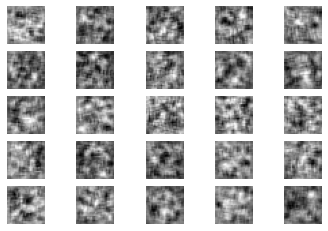

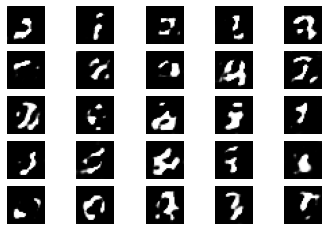

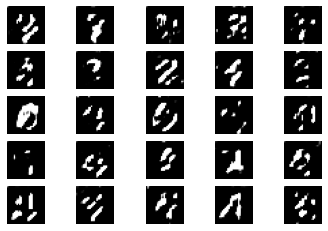

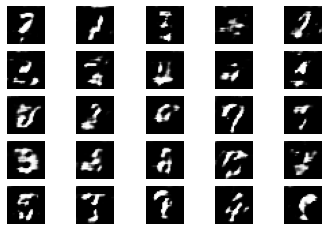

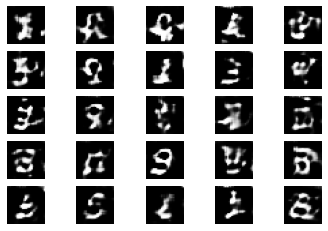

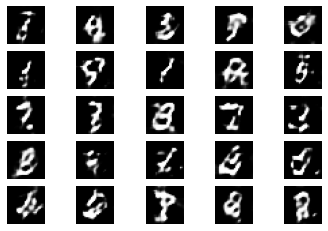

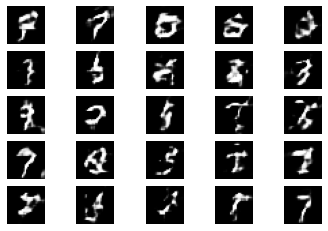

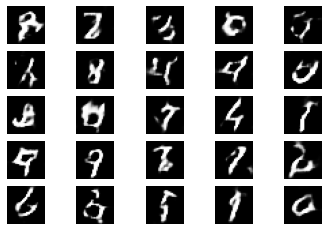

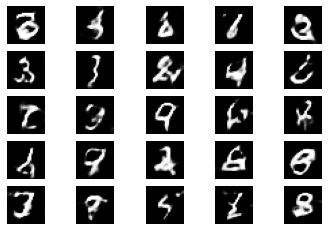

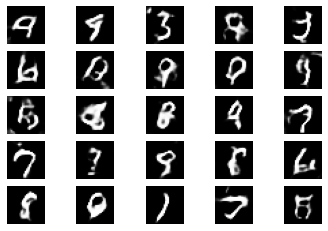

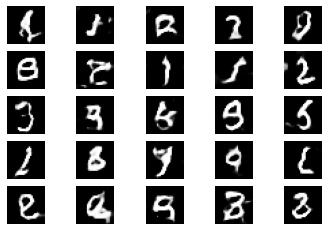

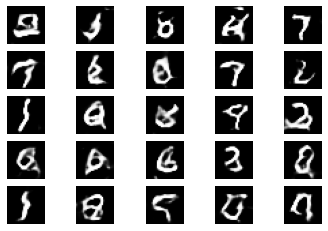

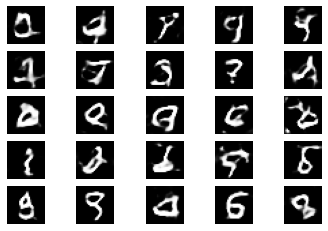

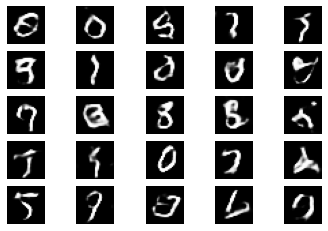

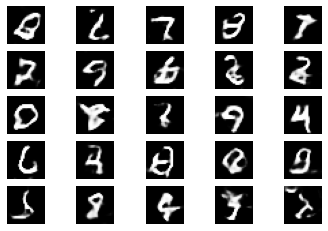

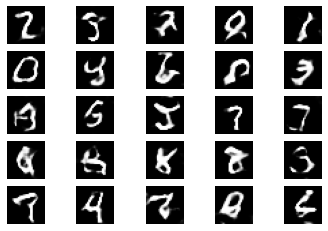

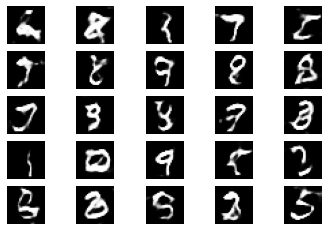

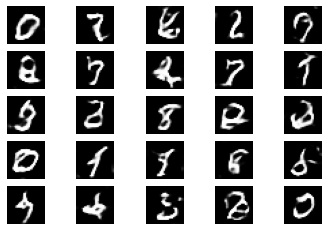

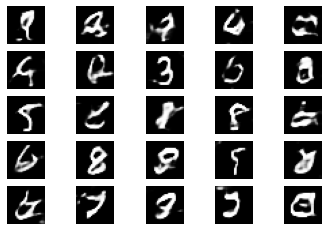

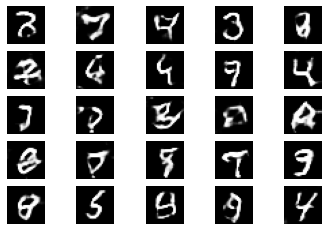

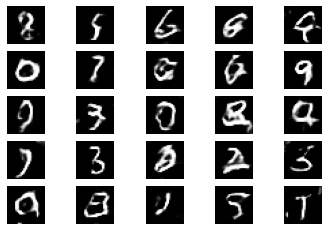

In [18]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  